# Using Convolutional neural networks to classify Sign language digits-KERAS

In [1]:
%matplotlib inline
from keras.preprocessing import image # Image processing 
import numpy as np # Numpy array manipulation
import os,shutil # Creating and copying directories
import matplotlib.pyplot as plt # Visualization

Using TensorFlow backend.


In [2]:
ogi_dir = '/Users/arth/Desktop/ML/projects/Sign Language/Dataset' # Source directory

In [3]:
# Create 3 directories (train ,test, validation) for ImageDataGenerator
train_dir = os.path.join(ogi_dir,'train')
test_dir = os.path.join(ogi_dir,'test')
validation_dir = os.path.join(ogi_dir,'validation')

def create_split(ogi_dir):
    if not os.path.exists(train_dir):
        os.mkdir(train_dir)
    if not os.path.exists(test_dir):
        os.mkdir(test_dir)
    if not os.path.exists(validation_dir):
        os.mkdir(validation_dir)

In [69]:
# Create classes (10) directories
def make_classes(train_dir, test_dir, validation_dir):
    for i in range(10):
        train_labels_dir = os.path.join(train_dir,str(i))
        if not os.path.exists(train_labels_dir):
            os.mkdir(train_labels_dir)
        test_labels_dir = os.path.join(test_dir,str(i))
        if not os.path.exists(test_labels_dir):
            os.mkdir(test_labels_dir)
        validation_labels_dir = os.path.join(validation_dir,str(i))
        if not os.path.exists(validation_labels_dir):
            os.mkdir(validation_labels_dir)

In [85]:
# Checking Number of images in each class
for d in os.listdir(ogi_dir):
    if d =='1':
        print(len(os.listdir(os.path.join(ogi_dir,d))))

206


In [4]:
train_size = 150 # Defining training size

In [98]:
def copy_data(ogi_dir, train_dir, test_dir, validation_dir):
    for i in range(10):
        src = os.path.join(ogi_dir,str(i))
        for f in os.listdir(src)[:train_size]:
            dest = os.path.join(train_dir,str(i))
            f_path = os.path.join(src,f)
            shutil.copy(f_path, dest)
        for f in os.listdir(src)[train_size:train_size+50]:
            dest = os.path.join(validation_dir,str(i))
            f_path = os.path.join(src,f)
            shutil.copy(f_path, dest)
        for f in os.listdir(src)[train_size+50:]:
            dest = os.path.join(test_dir,str(i))
            f_path = os.path.join(src,f)
            shutil.copy(f_path, dest)

In [104]:
# print(len(os.listdir(validation_labels_dir))) Validating on 50 samples

50


In [10]:
# Image Rescaling and preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size =(100,100), batch_size=16, class_mode= 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size =(100,100), batch_size=16, class_mode= 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size =(100,100), batch_size=16, class_mode= 'categorical')

Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Found 62 images belonging to 10 classes.


In [5]:
from keras import models,layers
from keras import optimizers

In [13]:
# Defining model
height = 100
width = 100
channels = 3
num_classes = 10

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.load_weights('SignLanguage_88_S.h5')

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'], loss='categorical_crossentropy')

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 48s 480ms/step - loss: 0.5174 - acc: 0.8225 - val_loss: 0.5616 - val_acc: 0.8122
Epoch 2/30
100/100 [==============================] - 56s 559ms/step - loss: 0.5436 - acc: 0.8160 - val_loss: 0.5449 - val_acc: 0.8236
Epoch 3/30
100/100 [==============================] - 54s 542ms/step - loss: 0.5269 - acc: 0.8171 - val_loss: 0.6657 - val_acc: 0.7893
Epoch 4/30
100/100 [==============================] - 54s 544ms/step - loss: 0.5103 - acc: 0.8260 - val_loss: 0.6209 - val_acc: 0.8109
Epoch 5/30
100/100 [==============================] - 63s 632ms/step - loss: 0.4917 - acc: 0.8448 - val_loss: 0.6510 - val_acc: 0.7754
Epoch 6/30
100/100 [==============================] - 65s 648ms/step - loss: 0.4847 - acc: 0.8398 - val_loss: 0.5668 - val_acc: 0.8122
Epoch 7/30
100/100 [==============================] - 63s 629ms/step - loss: 0.5042 - acc: 0.8367 - val_loss: 0.5891 - val_acc: 0.8058
Epoch 8/30
100/100 [==============================] - 6

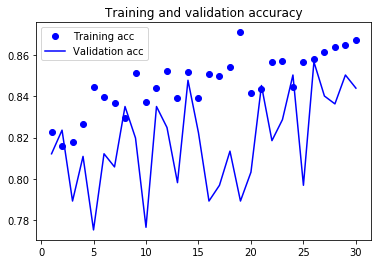

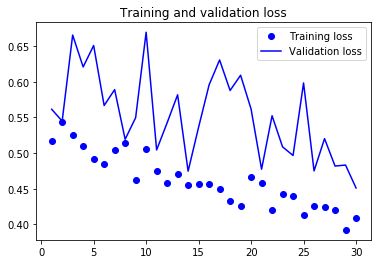

In [15]:
# Visualizing Loss and Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
# Evaluating on Test set
model.evaluate_generator(test_generator)

[0.32163787753351275, 0.90322580645161288]

In [127]:
test_img_path = os.path.join(test_dir,'3')
test_img_path = os.path.join(test_img_path,os.listdir(test_img_path)[0])
print(test_img_path)

/Users/arth/Desktop/ML/projects/Sign Language/Dataset/test/3/IMG_4479.JPG


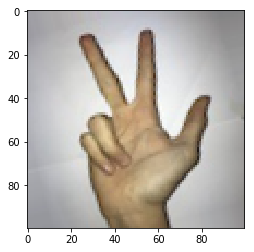

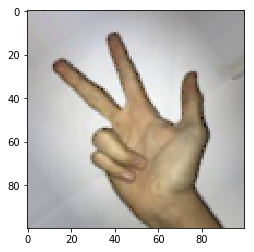

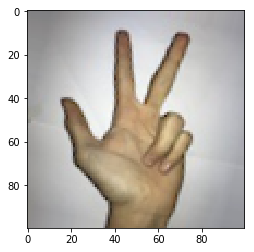

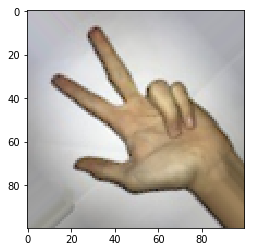

In [128]:
img = image.load_img(test_img_path,target_size = (100,100))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [129]:
np.argmax(model.predict(x))

3

In [17]:
model.save('SignLanguage_90_S.h5')